In [1]:
import numpy as np
from TwoSpin import TwoSpinDiscrete, TwoSpinSpherical
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
N = 100
T = 0.1
B = 0.0
J = 1.0
iterations = 1000
model = TwoSpinDiscrete(N=N, T=T, B=B)
model.setRandomCoupling(J)

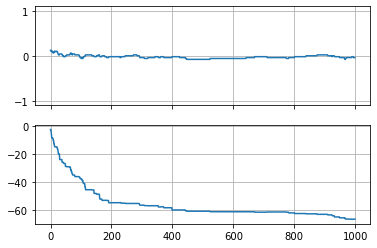

In [3]:
H_array, m_array = model.flip_many_times(iterations)
fig, ax = plt.subplots(2, 1, sharex='all')
ax[0].plot(m_array)
ax[0].set_ylim(-1.1, 1.1)
ax[1].plot(H_array)
for ax_ in ax:
    ax_.grid()
plt.show()

In [4]:
replicas = 100
H_array = np.zeros(shape=(replicas,))
s_end = np.zeros(shape=(replicas, N))
for i in range(replicas):
    model.s = np.random.randint(2, size=(N, 1)) * 2 - 1
    __H_array, _ = model.flip_many_times(iterations)
    H_array[i] = __H_array[-1]
    s_end[i] = model.s.copy()[:, 0]

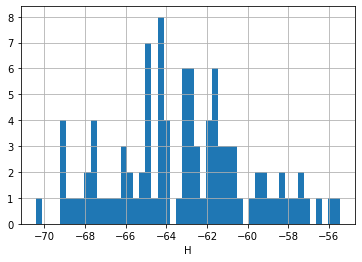

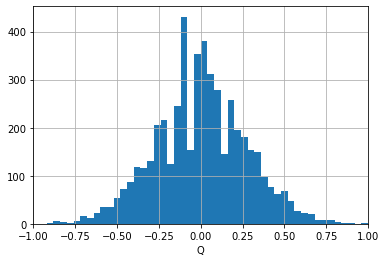

In [5]:
Q = 1 / N * s_end @ s_end.transpose()
Q = Q[np.triu_indices(replicas, 1)]

fig, ax = plt.subplots(1, 1, sharex='all')
ax.hist(H_array, bins=50)
ax.grid()
ax.set_xlabel('H')

fig, ax = plt.subplots(1, 1, sharex='all')
ax.hist(Q, bins=50, range=(-1, 1))
ax.grid()
ax.set_xlabel('Q')
ax.set_xlim((-1, 1))

plt.show()